
# Cargar el archivo "alumnos.zip": Esta línea es un comentario y no tiene efecto en el código. Explica que la próxima línea de código se utiliza para cargar el archivo ZIP llamado "alumnos.zip".

In [1]:
# Importar el módulo "files" de Google Colab para subir archivos desde la computadora
from google.colab import files

# Cargar el archivo "javiera_y_luis.zip" subido por el usuario.
# Aparecerá un cuadro de diálogo para seleccionar el archivo en tu computadora.
uploaded = files.upload()

# Importar el módulo zipfile para trabajar con archivos comprimidos en formato ZIP
import zipfile

# Importar el módulo io para trabajar con flujos de datos en memoria
import io

# Crear un objeto ZipFile para leer el archivo ZIP subido.
# io.BytesIO(uploaded['javiera_y_luis.zip']) convierte los datos binarios del archivo subido
# en un objeto similar a un archivo que puede ser leído por el módulo zipfile.
data = zipfile.ZipFile(io.BytesIO(uploaded['alumnos.zip']), 'r')

# Extraer todos los archivos contenidos en el archivo ZIP en el directorio actual de Google Colab
data.extractall()

# Después de ejecutar este código, los archivos descomprimidos estarán disponibles
# para ser usados directamente en Colab.


Saving alumnos.zip to alumnos.zip


In [2]:
# Importar librerías necesarias
import cv2  # Librería para trabajar con imágenes y videos
#Esta es la biblioteca de OpenCV, utilizada para operaciones de procesamiento de imágenes y visión por computadora.
import numpy as np  # Librería para manejar arreglos numéricos
#Una biblioteca fundamental para la computación científica en Python, que proporciona soporte para arrays multidimensionales.
import os  # Librería para manejar el sistema de archivos
#Proporciona funciones para interactuar con el sistema operativo, como listar los archivos de un directorio.
import matplotlib.pyplot as plt  # Librería para generar gráficos
#Una biblioteca para crear visualizaciones estáticas, animadas e interactivas en Python.

# Definir la ruta donde están las imágenes de javiera
ruta_javiera = "/content/javiera"
javiera = []  # Lista donde se almacenarán las imágenes de javiera procesadas
img_size = 150  # Tamaño al cual se redimensionarán las imágenes (150x150 píxeles)

# Bucle para cargar y procesar las imágenes de javiera
for img in os.listdir(ruta_javiera):  # Iterar sobre todas las imágenes en la carpeta, Iteración sobre cada imagen en la carpeta especificada por ruta_javiera usando os.listdir
    img = cv2.imread(os.path.join(ruta_javiera,img))  # Leer la imagen
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB (OpenCV usa BGR por defecto)
    img_resize = cv2.resize(img, (img_size, img_size))  # Redimensionar la imagen a 150x150
    javiera.append(img_resize)  # Añadir la imagen redimensionada a la lista 'javiera'

# Definir la ruta donde están las imágenes de luis
ruta_luis = "/content/luis"
luis = []  # Lista donde se almacenarán las imágenes de luis procesadas

# Bucle para cargar y procesar las imágenes de luis
for img in os.listdir(ruta_luis):  # Iterar sobre todas las imágenes en la carpeta
    img = cv2.imread(os.path.join(ruta_luis,img))  # Leer la imagen
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
    img_resize = cv2.resize(img, (img_size, img_size))  # Redimensionar la imagen a 150x150
    luis.append(img_resize)  # Añadir la imagen redimensionada a la lista 'luis'

# Unir las listas de imágenes de javiera y luis en un solo arreglo
images = np.concatenate([javiera, luis])

# Etiquetar las imágenes: 0 para javiera y 1 para luis
etiquetas_javiera = np.repeat(0, len(javiera))  # Crear una lista de ceros (etiqueta para javiera)
etiquetas_luis = np.repeat(1, len(luis))  # Crear una lista de unos (etiqueta para luis)
Labels = np.concatenate([etiquetas_javiera, etiquetas_luis])  # Unir las etiquetas de javiera y luis

# Nombres de las clases (javiera y luis)
class_name = ['javiera', 'luis']


In [3]:
# Inicializar TensorFlow 2.x en Google Colab
%tensorflow_version 2.x  # Solo necesario si estás trabajando en Google Colab para asegurarte de que se use TensorFlow 2.x

# Importar las librerías necesarias de TensorFlow y Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models  # Importar módulos para construir y entrenar modelos

# Definir la arquitectura del modelo CNN (Convolutional Neural Network)
model = keras.Sequential([  # Usamos el tipo de modelo secuencial, que permite apilar capas en orden
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # Primera capa convolucional con 32 filtros, de tamaño 3x3, y activación ReLU
    layers.MaxPooling2D((2, 2)),  # Capa de max-pooling para reducir la dimensionalidad, ventana de 2x2
    layers.Conv2D(64, (3, 3), activation='relu'),  # Segunda capa convolucional con 64 filtros, de tamaño 3x3, y activación ReLU
    layers.MaxPooling2D((2, 2)),  # Otra capa de max-pooling de 2x2
    layers.Flatten(),  # Aplanar la salida de las capas convolucionales para convertirlas en un vector
    layers.Dense(128, activation='relu'),  # Capa densa (fully connected) con 128 neuronas y activación ReLU
    layers.Dense(2, activation='softmax'),  # Capa de salida con 2 neuronas (dos clases: javiera y luis), activación softmax para clasificación multiclase
])

# Compilar el modelo
model.compile(optimizer='adam',  # Usar el optimizador Adam, un método eficiente de optimización del gradiente descendente
              loss='sparse_categorical_crossentropy',  # Función de pérdida: se usa sparse_categorical_crossentropy para clasificación de etiquetas enteras (0 o 1)
              metrics=['accuracy'])  # Métrica a evaluar: exactitud (accuracy)

# Entrenar el modelo
model.fit(images, Labels, epochs=80)  # Entrenar el modelo usando las imágenes y sus etiquetas, durante 80 épocas


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 286ms/step - accuracy: 0.5000 - loss: 53.1269
Epoch 2/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 385ms/step - accuracy: 0.7806 - loss: 54.7312
Epoch 3/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 428ms/step - accuracy: 0.4099 - loss: 145.2457
Epoch 4/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 389ms/step - accuracy: 0.6801 - loss: 41.1061
Epoch 5/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 326ms/step - accuracy: 0.7598 - loss: 29.9021
Epoch 6/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - accuracy: 0.9804 - loss: 0.3413
Epoch 7/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - accuracy: 0.9700 - loss: 0.0240
Epoch 8/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 274ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 11/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 12/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 318ms/step -

Saving IMG_20240904_191958162_MFNR.jpg to IMG_20240904_191958162_MFNR.jpg


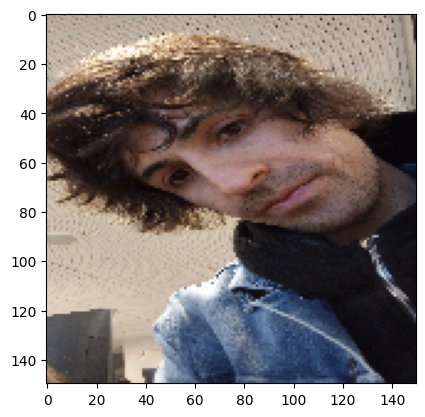

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
[[0.47787744 0.5221226 ]]
1.0
La imagen fue clasificada como: 'luis'


In [5]:
# Subir una imagen de prueba desde tu computadora
uploaded = files.upload()  # Se abre un cuadro de diálogo para subir una imagen desde la computadora

# Procesar la imagen subida
for fn in uploaded.keys():  # Iterar sobre los archivos subidos
    path = '/content/' + fn  # Crear la ruta completa donde se almacena la imagen en el entorno de Colab
    img = cv2.imread(path)  # Leer la imagen usando OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir la imagen de BGR a RGB (formato estándar)

    # Redimensionar la imagen al tamaño que espera el modelo (150x150 píxeles)
    img_resize = cv2.resize(img, (img_size, img_size))

    # Mostrar la imagen redimensionada utilizando matplotlib
    plt.imshow(img_resize)
    plt.show()

    # Normalizar la imagen para que los valores de los píxeles estén entre 0 y 1
    img = np.array(img_resize) / 255.0  # Convertir los valores de la imagen de [0, 255] a [0, 1]

    # Ajustar la forma de la imagen para que sea compatible con el modelo
    # El modelo espera una entrada con la forma (1, 150, 150, 3), donde:
    # 1 es el número de imágenes (batch size), 150x150 son las dimensiones de la imagen, y 3 son los canales de color (RGB)
    img = img.reshape(1, img_size, img_size, 3)

    # Realizar la predicción con el modelo entrenado
    predictions_single = model.predict(img)  # Obtener las predicciones del modelo para la imagen

    # Mostrar las predicciones para cada clase (0 = javiera, 1 = luis)
    print(predictions_single)

    # Verificar que las probabilidades sumen 1 (propiedad de las salidas de la capa softmax)
    print(np.sum(predictions_single))

    # Obtener la clase predicha (el índice de la clase con la mayor probabilidad)
    predicted_class = np.argmax(predictions_single)  # argmax retorna el índice con el valor más alto

    # Asignar el nombre de la clase (javiera o luis) basado en la predicción
    predicted_class_name = class_name[predicted_class]  # class_name es la lista ['javiera', 'luis']

    # Mostrar el resultado de la clasificación
    print("La imagen fue clasificada como: '{}'".format(predicted_class_name))
